In [1]:
## VinayBalajiReddy

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import math

td=pd.read_csv("train.csv")

In [2]:
td.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Pclass', ylabel='count'>

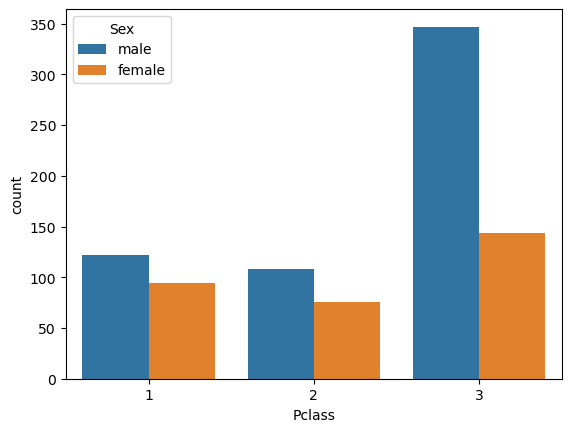

In [3]:
sb.countplot(x="Pclass", hue="Sex",data=td)

<Axes: xlabel='Survived', ylabel='count'>

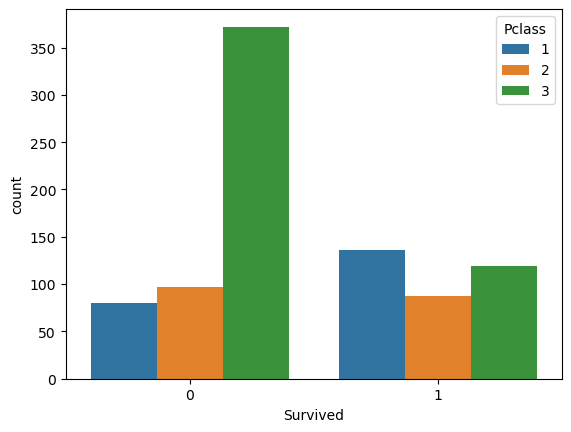

In [4]:
sb.countplot(x="Survived", hue="Pclass",data=td)

<Axes: xlabel='Survived', ylabel='count'>

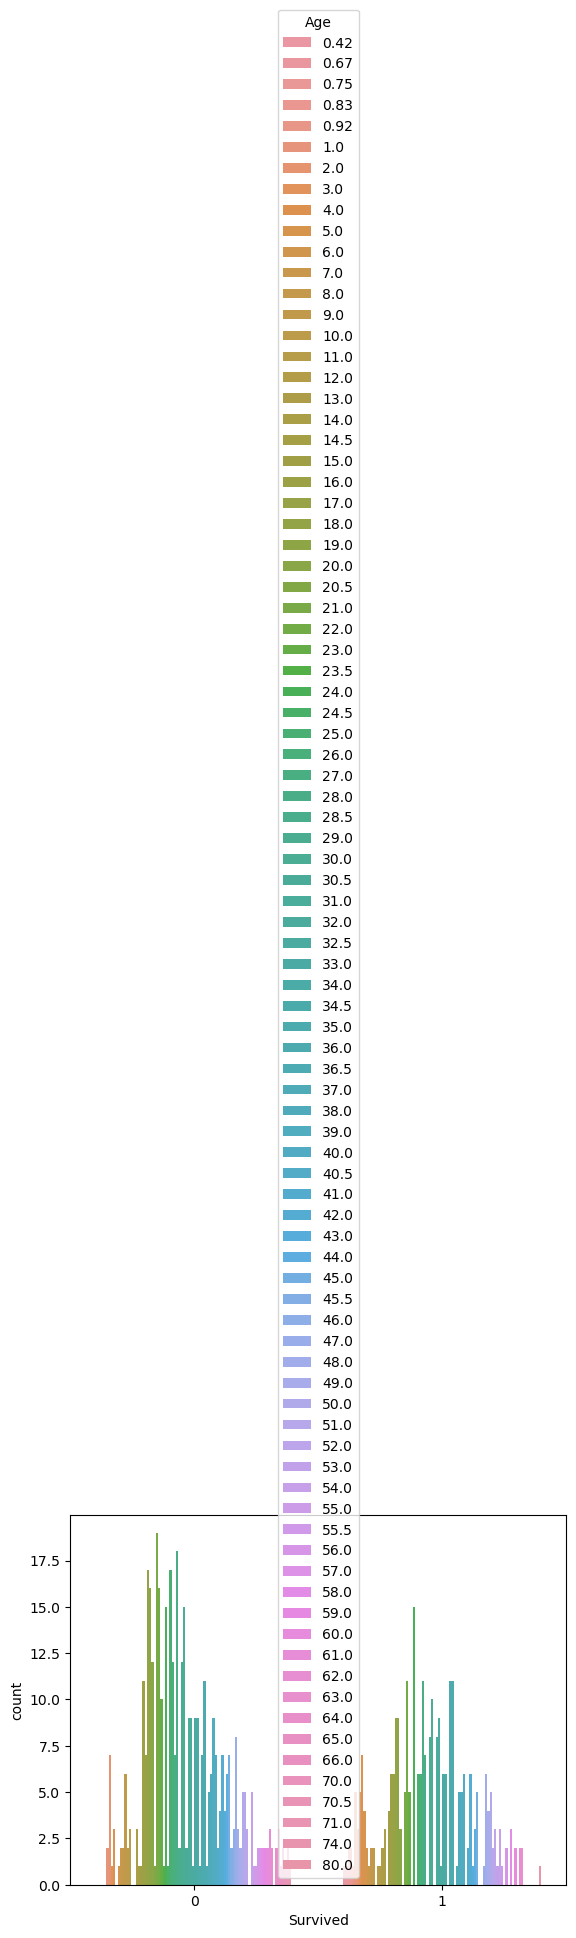

In [5]:
sb.countplot(x="Survived", hue="Age",data=td)

In [6]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
td.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
td.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
td.drop(["Name","PassengerId","Ticket"],axis=1,inplace=True)

In [10]:
td.Age.mean()

29.69911764705882

In [11]:
td['Age'] = td['Age'].fillna(td['Age'].mean())

In [12]:
td.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [13]:
td.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    bool 
 1   Pclass    891 non-null    bool 
 2   Sex       891 non-null    bool 
 3   Age       891 non-null    bool 
 4   SibSp     891 non-null    bool 
 5   Parch     891 non-null    bool 
 6   Fare      891 non-null    bool 
 7   Cabin     891 non-null    bool 
 8   Embarked  891 non-null    bool 
dtypes: bool(9)
memory usage: 8.0 KB


In [14]:
td.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [15]:
td.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    bool 
 1   Pclass    891 non-null    bool 
 2   Sex       891 non-null    bool 
 3   Age       891 non-null    bool 
 4   SibSp     891 non-null    bool 
 5   Parch     891 non-null    bool 
 6   Fare      891 non-null    bool 
 7   Cabin     891 non-null    bool 
 8   Embarked  891 non-null    bool 
dtypes: bool(9)
memory usage: 8.0 KB


In [16]:
td.loc[(td["Survived"] == 1) & (td["Pclass"] == 1) & (td["Cabin"].isna()), "Cabin"] = "B89"
td.loc[(td["Survived"] == 1) & (td["Pclass"] == 2) & (td["Cabin"].isna()), "Cabin"] = "E102"
td.loc[(td["Survived"] == 1) & (td["Pclass"] == 3) & (td["Cabin"].isna()), "Cabin"] = "E120"

td.loc[(td["Survived"] == 0) & (td["Pclass"] == 1) & (td["Cabin"].isna()), "Cabin"] = "C119"
td.loc[(td["Survived"] == 0) & (td["Pclass"] == 2) & (td["Cabin"].isna()), "Cabin"] = "E"
td.loc[(td["Survived"] == 0) & (td["Pclass"] == 3) & (td["Cabin"].isna()), "Cabin"] = "G"

In [17]:
td["Embarked"].fillna("S", inplace=True)

In [18]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [19]:
print(td['Sex'])

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object


In [20]:
print(td['Embarked'])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object


In [21]:
print(td['Pclass'])

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64


In [22]:
cabin=pd.get_dummies(td['Cabin'])

In [23]:
print(cabin)

     A10  A14  A16  A19  A20  A23  A24  A26  A31  A32  ...  F E69  F G63  \
0      0    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      0    0    0    0    0    0    0    0    0    0  ...      0      0   
3      0    0    0    0    0    0    0    0    0    0  ...      0      0   
4      0    0    0    0    0    0    0    0    0    0  ...      0      0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
886    0    0    0    0    0    0    0    0    0    0  ...      0      0   
887    0    0    0    0    0    0    0    0    0    0  ...      0      0   
888    0    0    0    0    0    0    0    0    0    0  ...      0      0   
889    0    0    0    0    0    0    0    0    0    0  ...      0      0   
890    0    0    0    0    0    0    0    0    0    0  ...      0      0   

     F G73  F2  F33  F38  F4  G  G6  T  
0        0   0    0    0   0  1   0  0  
1    

In [24]:
td.drop(["Pclass","Sex","Embarked","Cabin"],axis=1,inplace=True)

In [25]:
td=pd.concat([td,cabin],axis=1)

In [26]:
print(td.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 158 entries, Survived to T
dtypes: float64(2), int64(3), uint8(153)
memory usage: 168.1 KB
None


In [27]:
X=td.drop(["Survived"],axis=1)

In [28]:
print(X)

           Age  SibSp  Parch     Fare  A10  A14  A16  A19  A20  A23  ...  \
0    22.000000      1      0   7.2500    0    0    0    0    0    0  ...   
1    38.000000      1      0  71.2833    0    0    0    0    0    0  ...   
2    26.000000      0      0   7.9250    0    0    0    0    0    0  ...   
3    35.000000      1      0  53.1000    0    0    0    0    0    0  ...   
4    35.000000      0      0   8.0500    0    0    0    0    0    0  ...   
..         ...    ...    ...      ...  ...  ...  ...  ...  ...  ...  ...   
886  27.000000      0      0  13.0000    0    0    0    0    0    0  ...   
887  19.000000      0      0  30.0000    0    0    0    0    0    0  ...   
888  29.699118      1      2  23.4500    0    0    0    0    0    0  ...   
889  26.000000      0      0  30.0000    0    0    0    0    0    0  ...   
890  32.000000      0      0   7.7500    0    0    0    0    0    0  ...   

     F E69  F G63  F G73  F2  F33  F38  F4  G  G6  T  
0        0      0      0   0    

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 157 entries, Age to T
dtypes: float64(2), int64(2), uint8(153)
memory usage: 161.1 KB


In [30]:
y=td["Survived"]

In [31]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 114 to 37
Columns: 157 entries, Age to T
dtypes: float64(2), int64(2), uint8(153)
memory usage: 117.4 KB


In [35]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 862 to 92
Columns: 157 entries, Age to T
dtypes: float64(2), int64(2), uint8(153)
memory usage: 50.5 KB


In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lm=LogisticRegression(max_iter=10000)

In [38]:
print(lm.fit(X_train,y_train))

LogisticRegression(max_iter=10000)


In [39]:
Predections=lm.predict(X_test)

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_test,Predections))

              precision    recall  f1-score   support

           0       0.99      0.89      0.93       153
           1       0.87      0.98      0.92       115

    accuracy                           0.93       268
   macro avg       0.93      0.94      0.93       268
weighted avg       0.94      0.93      0.93       268



In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
print(confusion_matrix(y_test,Predections))

[[136  17]
 [  2 113]]


In [44]:
from sklearn.metrics import accuracy_score

In [45]:
print(accuracy_score(y_test,Predections))

0.9291044776119403
